# 2-3 回帰のパラメーター探索をしよう！

In [2]:
# 出力時に小数点以下3桁に
%precision 4
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

X, y = load_boston(True)

%precision 4とすると、出力時に小数点以下4桁で表示します。

RidgeCVを使うと、指定されたαの中から最もスコアがよいものを探索してくれます（CVは、クロスバリデーションです）。

RidgeCVの主なパラメーターは以下のようになります。

///////////

オプション	 デフォルト	 説明

alphas	 (0.1, 1.0, 10.0)	 探索対象

fit_intercept	True	切片が0でないか

normalize	False	正規化するか

scoring	None	評価関数の指定

cv	None	クロスバリデーションのパラメーター

///////////

※normalizeは、fit_intercept=Trueのときだけ有効です。

cvオプションで整数を指定すると、クロスバリデーションの分割数を指定できます。
cv=Noneで一般クロスバリデーション（Generalized Cross-Validation）になります。一般クロスバリデーションは効率的なので、cv=Noneをおすすめします。

In [3]:
ridge = RidgeCV(scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.1000

RidgeCVで確認
クロスバリデーションを行うので、トレーニングデータとテストデータに分割する必要はありません。

scoring='r2'とし、評価関数として決定係数を指定します。
alphasは、デフォルトで、(0.1, 1.0, 10.0)なので、この3つから探索します。結果は、alpha_で確認できます。0.1となったので、さらに詳しく調べます。
結果的に、αは0に近い方が良いことがわかります。

In [4]:
# さらにαの探索
ridge = RidgeCV([0.0001, 0.001, 0.01, 0.1], scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.0001

In [5]:
# 係数の確認
ridge.coef_

array([-1.07169875e-01,  4.63951761e-02,  2.08554789e-02,  2.68854410e+00,
       -1.77946044e+01,  3.80476160e+00,  7.50351697e-04, -1.47574178e+00,
        3.05652444e-01, -1.23272203e-02, -9.53450742e-01,  9.39103030e-03,
       -5.25467824e-01])

In [7]:
r2_score(y, ridge.predict(X))

0.7406

## Lassoのαの探索
LassoCVを使うと、クロスバリデーション（CV）して、平均二乗誤差が最小のαを選択できます。
αの探索リストは、自動で求められた範囲を対数スケールで分割して決められます。評価関数は、平均二乗誤差で変更できません。

In [22]:
%matplotlib inline
# 出力時に小数点以下3桁に
%precision 3
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

X, y = load_boston(True)

In [12]:
lasso = LassoCV()
lasso.fit(X,y)
lasso.alpha_

0.7248

αの探索リストは、alphas_に入ります。選択されたαは、alpha_に入ります。

また、 epsを小さくすると、探索範囲が広がります。（eps	0.001	αの範囲の最小値／αの範囲の最大値）

In [13]:
# αの確認
lasso = LassoCV(eps=0.0001)
lasso.fit(X, y)
lasso.alpha_

0.1390

※ n_alphasは、alphas=Noneのときに、内部でnumpy.logspaceのnumオプションとして使われます。αの探索リストは等比数列になります。

In [15]:
# αの確認
lasso = LassoCV(eps=0.0001, n_alphas=200)
lasso.fit(X, y)
lasso.alpha_

0.1451

In [16]:
# 係数の確認
lasso.coef_

array([-0.09637804,  0.0494098 , -0.02815393,  0.23633113, -0.        ,
        3.56880542, -0.00749663, -1.13601077,  0.2798095 , -0.01498795,
       -0.77934561,  0.01032705, -0.58203938])

In [17]:
# 平均二乗誤差の確認
mean_squared_error(y, lasso.predict(X))

23.2643

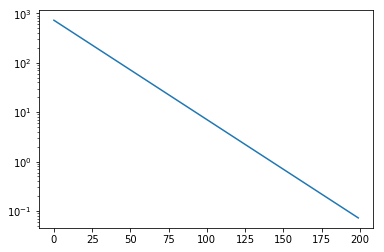

In [24]:
# αの探索リスト
plt.yscale('log')
plt.plot(lasso.alphas_);
# αの探索リストを対数軸のグラフで確認します。比率が一定でy軸を対数スケールにしているので、グラフは直線になります。

# Elastic Netでの探索

In [25]:
# 出力時に小数点以下3桁に
%precision 3
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [28]:
# l1_ratioの探索リスト
l1_ratio = np.arange(0.1, 1.1 , 0.1)
l1_ratio

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [27]:
# l1_ratioとαの探索
enet = ElasticNetCV(l1_ratio=l1_ratio)
enet.fit(X, y)
enet.l1_ratio_, enet.alpha_

(0.600, 1.208)

In [29]:
# αの探索リストの範囲
enet.alphas_.min(), enet.alphas_.max()

(0.725, 7248.204)

In [30]:
# 平均二乗誤差
mean_squared_error(y, enet.predict(X))

27.238